In [1]:
from hydradx.model.processing import get_omnipool_data, get_binance_orderbook, get_kraken_orderbook, get_omnipool, load_omnipool, save_omnipool
from hydradx.model.amm.omnipool_amm import OmnipoolState
from hydradx.model.amm.centralized_market import CentralizedMarket
from hydradx.model.amm.agents import Agent

import matplotlib.pyplot as plt

from pprint import pprint
from mpmath import mpf, mp
mp.dps = 50

from hydradxapi import HydraDX


In [2]:

RPC="wss://rpc.hydradx.cloud"
            
# asset_list, asset_map, tokens, fees = get_omnipool_data(RPC, archive=False)



In [3]:
# pprint(asset_list)

In [4]:
get_live_markets = True

if get_live_markets:
    omnipool = get_omnipool()
else:
    omnipool = load_omnipool()
pprint(omnipool)

Omnipool: omnipool
********************************
tvl cap: inf
LRNA imbalance: 0.0
lrna fee:

    4-Pool: 0.05%
    HDX: 0.05%
    WETH: 0.05%
    2-Pool101: 0.05%
    GLMR: 0.05%
    BNC: 0.05%
    vDOT: 0.05%
    CFG: 0.05%
    2-Pool102: 0.05%
    DOT: 0.05%
    PHA: 0.05%
    ZTG: 0.05%
    INTR: 0.05%
    ASTR: 0.05%

asset fee:

    4-Pool: 0.25%
    HDX: 0.7667%
    WETH: 0.25%
    2-Pool101: 0.25%
    GLMR: 0.25%
    BNC: 0.25%
    vDOT: 0.25%
    CFG: 0.25%
    2-Pool102: 0.25%
    DOT: 0.25%
    PHA: 0.25%
    ZTG: 0.25%
    INTR: 0.25%
    ASTR: 0.25%

asset pools: (

    *4-Pool*
    asset quantity: 1573705.2928776364
    lrna quantity: 39924.24122416011
    USD price: 1.000567624438
    tvl: $1574598.566459492
    weight: 39924.24122416011/574604.8585043465 (0.06948121066723997)
    weight cap: 1
    total shares: 1573705.2928776364
    protocol shares: 1573705.2928776364

    *HDX*
    asset quantity: 47875923.527265646
    lrna quantity: 45021.19409356584
    USD price

In [5]:
# save = True
# if save:
#     save_omnipool(omnipool)

In [6]:
cex_asset_tkn = "DOT"
cex_denom_tkn = "USD"
dex_asset_tkn = "DOT"
dex_denom_tkn = "USDT10"
one_hop = False
try:
    kraken_ob = get_kraken_orderbook((cex_asset_tkn, cex_denom_tkn), archive=False)
    cex = CentralizedMarket(
        order_book={(cex_asset_tkn, cex_denom_tkn): kraken_ob},
        asset_list=[cex_asset_tkn, cex_denom_tkn],
        trade_fee=0.001
    )
    one_hop = True
except:  # orderbook doesn't exist? try going through USD
    asset_ob = get_kraken_orderbook((cex_asset_tkn, "USD"), archive=False)
    denom_ob = get_kraken_orderbook((cex_denom_tkn, "USD"), archive=False)
    cex = CentralizedMarket(
        order_book={(cex_asset_tkn, "USD"): asset_ob, (cex_denom_tkn, "USD"): denom_ob},
        asset_list=[cex_asset_tkn, cex_denom_tkn, "USD"],
        trade_fee=0.0026
    )
    

In [7]:
if one_hop:
    cex_spot = (cex.order_book[(cex_asset_tkn, cex_denom_tkn)].bids[0][0] + cex.order_book[(cex_asset_tkn, cex_denom_tkn)].asks[0][0]) / 2
else:
    cex_asset_spot = (cex.order_book[(cex_asset_tkn, "USD")].bids[0][0] + cex.order_book[(cex_asset_tkn, "USD")].asks[0][0]) / 2
    cex_denom_spot = (cex.order_book[(cex_denom_tkn, "USD")].bids[0][0] + cex.order_book[(cex_denom_tkn, "USD")].asks[0][0]) / 2
    cex_spot = cex_asset_spot / cex_denom_spot


# dex_denom_data = tokens[dex_denom_tkn]
# dex_denom_scale = mpf(1)
# overall_scale = mpf(1)
# dex_denom_lrna = dex_denom_data['LRNA'] * dex_denom_scale * overall_scale
# dot_liquidity = tokens[dex_asset_tkn]['liquidity'] * overall_scale
# dot_lrna = tokens[dex_asset_tkn]['LRNA'] * overall_scale
# dex_denom_liquidity = cex_spot * dex_denom_lrna * dot_liquidity / dot_lrna
# dex_denom_data_up = {'LRNA': dex_denom_lrna, 'liquidity': dex_denom_liquidity}
# hdx_data = {'LRNA': tokens['HDX']['LRNA'] * overall_scale, 'liquidity': tokens['HDX']['liquidity'] * overall_scale}
# dot_data = {'LRNA': dot_lrna, 'liquidity': dot_liquidity}

# op_state = OmnipoolState(
#     # tokens={dex_denom_tkn: dex_denom_data_up, dex_asset_tkn: dot_data, "HDX": hdx_data,
#     #         "USD": {"LRNA": mpf(10000), "liquidity": mpf(10000)}},
#     tokens=tokens,
#     preferred_stablecoin="USDT",
#     lrna_fee=0.0000,
#     asset_fee=0.0000
# )
op_state = omnipool

protocol_agent = Agent(holdings={"DOT": mpf(500000)})
op_state.add_liquidity(protocol_agent, 500000, "DOT")

# protocol_agent = Agent(holdings={"DOT": mpf(500000)})
# op_state.add_liquidity(protocol_agent, 500000, "DOT")


op_state.asset_fee = 0.0025
op_state.lrna_fee = 0.0005

    
# pprint(tokens)
print(op_state.liquidity)

{'4-Pool': 1573705.2928776364, 'HDX': 47875923.527265646, 'WETH': 1097.626989448107, '2-Pool101': 54.49487379181509, 'GLMR': 692733.57698674, 'BNC': 566163.1677507104, 'vDOT': 244752.4564469301, 'CFG': 1018555.447679851, '2-Pool102': 4476463.490967692, 'DOT': 1189083.8915721453, 'PHA': 1160236.0275251633, 'ZTG': 1961804.1095551646, 'INTR': 15017270.547587436, 'ASTR': 2742898.438438591}


In [8]:
op_spot = op_state.price(op_state, dex_asset_tkn, dex_denom_tkn)
pprint(op_spot)
pprint(cex_spot)
# pprint((cex.order_book[(cex_asset_tkn, cex_denom_tkn)].bids[0][0],cex.order_book[(cex_asset_tkn, cex_denom_tkn)].asks[0][0]))
# pprint((cex.order_book[(cex_asset_tkn, cex_denom_tkn)].asks[0][0] - cex.order_book[(cex_asset_tkn, cex_denom_tkn)].bids[0][0])/cex.order_book[(cex_asset_tkn, cex_denom_tkn)].bids[0][0])

6.834230201925144
6.88885


'DEX'
'CEX'


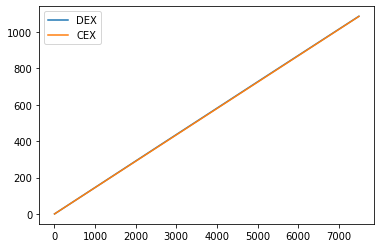

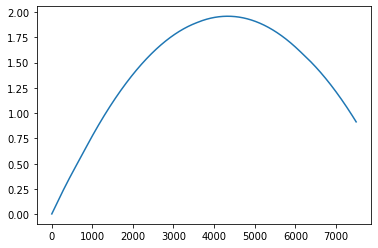

{('DOT', 'USD'): OrderBook(bids=SortedList([[6.8888, 1909.082], [6.8886, 627.362], [6.8885, 46.478], [6.8884, 194.456], [6.8883, 198.375], [6.888, 194.162], [6.8877, 29.0], [6.8876, 54.375], [6.8874, 95.169], [6.8873, 241.866], [6.8868, 484.829], [6.8867, 54.375], [6.8866, 14.258], [6.8865, 332.188], [6.8861, 509.676], [6.8858, 29.1], [6.8856, 54.375], [6.8854, 244.826], [6.8853, 1121.045], [6.8852, 728.7], [6.885, 640.0], [6.8841, 726.2], [6.884, 54.375], [6.8839, 26.0], [6.8834, 726.38], [6.8832, 54.375], [6.8817, 73.311], [6.8816, 54.375], [6.8814, 1453.173], [6.8809, 54.375], [6.8808, 1064.802], [6.8802, 3626.852], [6.8801, 54.375], [6.88, 436.047], [6.8795, 354.531], [6.8785, 54.375], [6.8783, 257.654], [6.8778, 54.375], [6.8769, 251.74], [6.8767, 54.375], [6.876, 1194.65], [6.8757, 54.375], [6.8752, 1423.738], [6.8748, 1312.985], [6.8744, 2140.998], [6.8741, 54.375], [6.8711, 205.729], [6.871, 423.777], [6.8694, 54.375], [6.8689, 3.279], [6.868, 54.375], [6.8618, 54.375], [6.8604

In [9]:
holdings = {}
for tkn in [cex_asset_tkn, cex_denom_tkn, dex_asset_tkn, dex_denom_tkn, "USD"]:
    if tkn not in holdings:
        holdings[tkn] = mpf(10000000)
agent = Agent(holdings=holdings)

asset_spot = omnipool.price(omnipool, dex_denom_tkn, "USDT10")
dollar_step_size = 5
trade_size_list = [dollar_step_size/asset_spot*i for i in range(1, 1500)]
dot_out_cex = []
dot_out_dex = []
for trade_size in trade_size_list:
    temp_op_state = op_state.copy()
    temp_cex_state = cex.copy()
    temp_agent1 = agent.copy()
    temp_agent2 = agent.copy()
    temp_op_state.swap(temp_agent1, tkn_buy=dex_asset_tkn, tkn_sell=dex_denom_tkn, sell_quantity=trade_size)
    if one_hop:
        temp_cex_state.swap(temp_agent2, tkn_buy=cex_asset_tkn, tkn_sell=cex_denom_tkn, sell_quantity=trade_size)
    else:
        temp_cex_state.swap(temp_agent2, tkn_buy="USD", tkn_sell=cex_denom_tkn, sell_quantity=trade_size)
        sell_amt_usd = temp_agent2.holdings["USD"] - agent.holdings["USD"]
        temp_cex_state.swap(temp_agent2, tkn_buy=cex_asset_tkn, tkn_sell="USD", sell_quantity=sell_amt_usd)
    dot_out_dex.append(temp_agent1.holdings[dex_asset_tkn] - agent.holdings[dex_asset_tkn])
    dot_out_cex.append(temp_agent2.holdings[cex_asset_tkn] - agent.holdings[cex_asset_tkn])
    # pprint(trade_size)
    # pprint(temp_op_state.price(temp_op_state, "DOT", "USDT"))
    
pprint("DEX")
plt.plot(trade_size_list, dot_out_dex, label="DEX")
# pprint(dot_out_dex)

pprint("CEX")
# pprint(dot_out_cex)
plt.plot(trade_size_list, dot_out_cex, label="CEX")
plt.legend()
plt.show()

diffs = [dot_out_dex[i] - dot_out_cex[i] for i in range(len(dot_out_dex))]
plt.plot(trade_size_list, diffs, label="DEX - CEX")
plt.show()

print(cex.order_book)

In [10]:
print(dot_out_cex[-1])

1086.085941779530685380450449883937835693359375


In [11]:
print(dot_out_dex[-1])

1087.00032890351940295659005641937255859375
